# MAS-12 lecture code
---

## Chapter 12   Classification

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

#print(iris)
#print(iris.DESCR,'\n')
#print(iris.data,'\n')
#print(iris.feature_names,'\n')
#print(iris.target,'\n')
#print(iris.target_names,'\n')

#iris dataset.
iris = load_iris()
ir = pd.DataFrame(data=iris.data, columns=iris.feature_names)
ir_species = pd.Series(iris.target)
ir_species = ir_species.map({0:"s", 1:"c", 2:"v"})
#print(ir.head(),'\n\n',ir_species.head())

## Crabs dataset.
crabs = pd.read_csv("./input/crabs.csv")
lcrabs = np.log(crabs.iloc[:,3:])
lcrabs_grp = list(np.repeat(["B","b","O","o"], [50]*4, axis = 0))
lcrabs_target = np.repeat([0,1,2,3], [50]*4, axis = 0)
lcrabs_target_name = np.array(["B","b","O","o"])
#print(crabs.head(),"\n\n", lcrabs_target,"\n\n",lcrabs_grp)

## fgl dataset.
fgl=pd.read_csv("./input/fgl.csv")
fgl_target=fgl.type
fgl_targetnames=['WinNF', 'WinF' ,'Head' ,'Veh' ,'Con', 'Tabl']
#print(fgl_target.value_counts())

##Cushings dataset.
Cushings=pd.read_csv("./input/Cushings.csv")
Cushings_target=Cushings.Type

#print(Cushings_target)

## 12.1  Discriminant Analysis

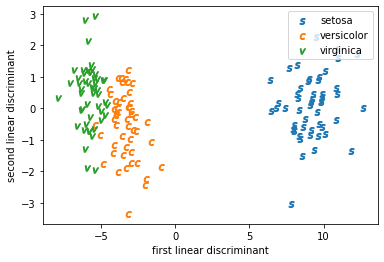

In [112]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

#iris dataset을 LDA 모델에 적합.
std_ir = StandardScaler().fit_transform(np.log(ir))
ir_lda=LDA()
ir_ld=ir_lda.fit_transform(std_ir,ir_species)
ir_ld[:,0]=-ir_ld[:,0]
#print(ir_ld)

#그래프를 그리기 위해 LDA 결과값을 dataframe으로 변환.
lda_columns=['LD1','LD2']
ir_ld = pd.DataFrame(ir_ld, columns=lda_columns)
#ir_ld['target']=iris.target
#print(ir_ld.iloc[0,:])

#각 범주의 알파벳을 그래프에 나타내기 위해 marker 지정.
markers=['$s$', '$c$', '$v$']

#그래프 그리기.
for i, marker in enumerate(markers):
    x_axis_data = ir_ld.loc[iris.target==i,:]['LD1']
    y_axis_data = ir_ld.loc[iris.target==i,:]['LD2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('first linear discriminant')
plt.ylabel('second linear discriminant')
plt.show()

In [113]:
#print(lcrabs)
std_cr = StandardScaler().fit_transform(lcrabs.drop(["BD"],axis=1))
dcrabs_lda = LDA().fit(std_cr,crabs.sex)
a=pd.DataFrame({'sex':crabs.sex,'predict_sex':dcrabs_lda.predict(std_cr)})
print(pd.crosstab(index=a.sex,columns=a.predict_sex))

#print(lcrabs.drop(["BD"],axis=1))
dcrabs_lda4 = LDA(n_components=3).fit(std_cr,lcrabs_grp)
dcrabs_pr4=pd.DataFrame(dcrabs_lda4.predict_proba(std_cr),columns=["B","O","b","o"])
#print(pd.Series(dcrabs_lda4.predict(std_cr)).value_counts())

#R에서 predict 함수의 dimen=2를 구현 못해서 다른 값이 나옴. 나중에 확인.
dcrabs_pr2=dcrabs_pr4[["B","O"]] @ [1,1]
#print(dcrabs_pr4)
print(pd.crosstab(index=a.sex,columns=[dcrabs_pr2>0.5]))

predict_sex   F   M
sex                
F            97   3
M             3  97
col_0  False  True
sex               
F         96     4
M          4    96


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/kyungseonlee/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- x1
- x2
Feature names seen at fit time, yet now missing:
- LD1
- LD2

  warnings.warn(message, FutureWarning)


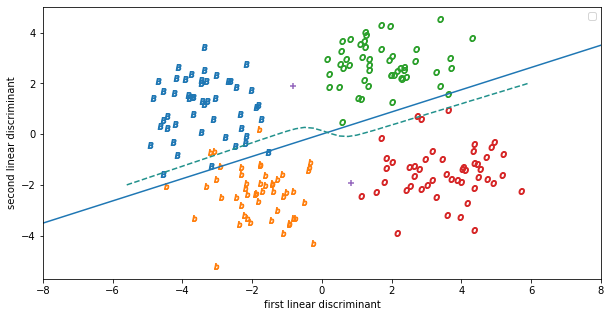

In [114]:
cr_t = dcrabs_lda4.transform(std_cr)[:,[0,1]]
#cr_t[:,1]=-cr_t[:,1]
#print(ir_ld)

#그래프를 그리기 위해 LDA 결과값을 dataframe으로 변환.
lda_columns=['LD1','LD2']
cr_t = pd.DataFrame(cr_t, columns=lda_columns)

#각 범주의 알파벳을 그래프에 나타내기 위해 marker 지정.
markers=['$B$','$b$', '$O$', '$o$']

#그래프 그리기.
fig=plt.figure(figsize=(10,5))
p1=fig.add_subplot(111)

for i, marker in enumerate(markers):
    x_axis_data = cr_t.loc[lcrabs_target==i,:]['LD1']
    y_axis_data = cr_t.loc[lcrabs_target==i,:]['LD2']
    
    p1.scatter(x_axis_data, y_axis_data, marker=marker)

p1.legend(loc='upper right')
p1.set_xlim(-8,8)
p1.set_xlabel('first linear discriminant')
p1.set_ylabel('second linear discriminant')

def perp(x,y):
    u=np.array([-8,8])
    m = (x+y)/2
    s = - (x[0] - y[0])/(x[1] - y[1])            
    p1.plot(u,s*u+m)
    
cr_m = LDA().fit(cr_t,crabs.sex).means_
#print(dcrabs_lda)
p1.scatter(cr_m[:,0],cr_m[:,1],marker="+")
perp(cr_m[0,:],cr_m[1,:])

cr_lda=LDA().fit(cr_t,lcrabs_grp)
x=np.arange(-6, 6.25, 0.25)
y=np.arange(-2, 2.25, 0.25)

x1= np.tile(x,len(y))
x2=np.repeat(y,len(x))

#print(x2)

Xcon = pd.DataFrame({'x1':x1,'x2':x2})
#print(Xcon)

#cr_pr= cr_lda.predict_proba(Xcon)
cr_pr=pd.DataFrame(cr_lda.predict_proba(Xcon),columns=["B","O",'b',"o"])[["B","O"]]@ [1,1]
cr_pr=cr_pr.values.reshape((len(y),len(x)))
#cr_pr=cr_pr.values.reshape((len(y),len(x))).transpose()
#print(cr_pr)

p1.contour(x,y,cr_pr,levels=1,linestyles='dashed' )

In [115]:
for i in range(0,4):
    c=lcrabs.loc[lcrabs_target==i,:]
    name=["B","b","O","o"][i]
    print(f"Covariance matrix of the column {name}","\n",pd.DataFrame.cov(c),"\n\n")

Covariance matrix of the column B 
           FL        RW        CL        CW        BD
FL  0.052964  0.043251  0.056633  0.056006  0.058748
RW  0.043251  0.037247  0.046800  0.046336  0.048304
CL  0.056633  0.046800  0.061045  0.060328  0.063118
CW  0.056006  0.046336  0.060328  0.059738  0.062495
BD  0.058748  0.048304  0.063118  0.062495  0.066021 


Covariance matrix of the column b 
           FL        RW        CL        CW        BD
FL  0.043578  0.043610  0.046080  0.045675  0.050083
RW  0.043610  0.045040  0.046544  0.046172  0.050729
CL  0.046080  0.046544  0.049147  0.048631  0.053537
CW  0.045675  0.046172  0.048631  0.048261  0.053015
BD  0.050083  0.050729  0.053537  0.053015  0.059463 


Covariance matrix of the column O 
           FL        RW        CL        CW        BD
FL  0.048712  0.040674  0.052366  0.052165  0.053486
RW  0.040674  0.035038  0.044230  0.044110  0.045120
CL  0.052366  0.044230  0.056893  0.056651  0.057999
CW  0.052165  0.044110  0.056651  0.05

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


        LD1       LD2
0 -1.843629  1.070204
1 -0.035910  1.007550
2 -0.329413  0.482676
3 -1.566863 -0.262982
4 -0.747609  0.644428
5 -1.345950 -0.398970
6 -0.849345  0.830698
7 -1.036526  0.832826
8 -0.165691  0.796089
9 -0.877693  0.514489


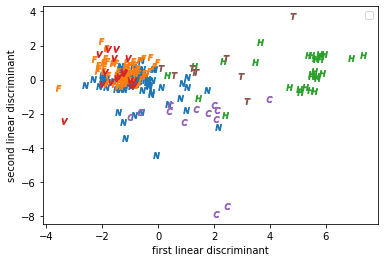

In [116]:
std_fgl = StandardScaler().fit_transform(fgl.drop(["type"],axis=1))

#R에서 predict 함수의 dimen=2를 구현 못해서
# + LDA 함수의 method="t"를 구현 못해서 다른 값이 나옴. 나중에 확인.
fgl_ld=LDA().fit(std_fgl,fgl_target).transform(std_fgl)[:,[0,1]]
fgl_ld[:,0]=-fgl_ld[:,0]
fgl_ld=pd.DataFrame(data=fgl_ld,columns=lda_columns)
print(fgl_ld[:10])

#각 범주의 알파벳을 그래프에 나타내기 위해 marker 지정.
markers=[ "$N$","$F$",  "$H$","$V$", "$C$", "$T$"]

#그래프 그리기.
for i, marker in enumerate(markers):
    name=fgl_targetnames[i]
    x_axis_data = fgl_ld.loc[fgl_target==name,:]['LD1']
    y_axis_data = fgl_ld.loc[fgl_target==name,:]['LD2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.legend(loc='upper right')
plt.xlabel('first linear discriminant')
plt.ylabel('second linear discriminant')
plt.show()

## 12.2  Classification theory

In [118]:
def predplot(object, main="", len = 100, ...):
    
    fig=plt.figure(figsize=(10,5))
    p1=fig.add_subplot(111)
    
    p1.scatter(Cushings.iloc[:,0], Cushings.iloc[:,1], log="xy", type="n",
         xlab = "Tetrahydrocortisone", ylab = "Pregnanetriol", main = main)

    for il in range(0,4) :
        set = Cushings$Type==levels(Cushings$Type)[il]
        text(Cushings[set, 1], Cushings[set, 2],
             labels=as.character(Cushings$Type[set]), col = 2 + il) }

    xp = np.linspace(0.6, 4.0, len)
    yp = np.linspace(-3.25, 2.45, len)
    cushT =pd.DataFrame([(x, y)  for y in yp for x in xp], 
                    columns=['Tetrahydrocortisone','Pregnanetriol'])
    
    
    Z = predict(object, cushT, ...)
    zp = as.numeric(Z$class)
    zp = Z$post[,3] - pmax(Z$post[,2], Z$post[,1])
    contour(exp(xp), exp(yp), matrix(zp, len),
            add = TRUE, levels = 0, labex = 0)
    zp = Z$post[,1] - pmax(Z$post[,2], Z$post[,3])
    contour(exp(xp), exp(yp), matrix(zp, len),
            add = TRUE, levels = 0, labex = 0)
    invisible()
}


SyntaxError: invalid syntax (1264976568.py, line 1)

In [119]:

cushplot = function(xp, yp, Z)
{
    plot(Cushings[, 1], Cushings[, 2], log = "xy", type = "n",
         xlab = "Tetrahydrocortisone", ylab = "Pregnanetriol")
    for(il in 0:4) {
        set = Cushings$Type==levels(Cushings$Type)[il]
        text(Cushings[set, 1], Cushings[set, 2],
             labels = as.character(Cushings$Type[set]), col = 2 + il) }
    zp = Z[, 3] - pmax(Z[, 2], Z[, 1])
    contour(exp(xp), exp(yp), matrix(zp, np),
            add = TRUE, levels = 0, labex = 0)
    zp = Z[, 1] - pmax(Z[, 2], Z[, 3])
    contour(exp(xp), exp(yp), matrix(zp, np),
            add = TRUE, levels = 0, labex = 0)
    invisible()
}

SyntaxError: invalid syntax (664713809.py, line 3)

In [120]:
##

cush=np.log(Cushings.drop(Cushings.columns[[2]],axis=1))
tp = Cushings.Type[0:21]
#print(tp)

In [196]:
##

cush_lda = LDA().fit(cush[0:21],tp)
cush_qda = QDA().fit(cush[0:21],tp)


LinearDiscriminantAnalysis()


In [121]:
par(mfrow = c(2,2))

fig=plt.figure(figsize=(10,5))
p1=fig.add_subplot(221)

predplot(cush_lda, "LDA")
predplot(cush_qda, "QDA")
predplot(cush_qda, "QDA (predictive)", method = "predictive")
predplot(cush_qda, "QDA (debiased)", method = "debiased")

NameError: name 'par' is not defined

In [122]:
#

#par(mfrow = c(1,2))

Cf = pd.DataFrame({'tp' : tp,
                'Tetrahydrocortisone' : np.log(Cushings[0:21].iloc[:,0]),
                'Pregnanetriol' : np.log(Cushings[0:21].iloc[:,1])} )
#print(Cf[0:10])

#cush_multinom = multinom(tp ~ Tetrahydrocortisone + Pregnanetriol, Cf, maxit = 250)


  tp  Tetrahydrocortisone  Pregnanetriol
0  a             1.131402       2.459589
1  a             1.098612       0.262364
2  a             0.641854      -2.302585
3  a             1.335001      -3.218876
4  a             1.410987       0.095310
5  a             0.641854      -0.916291
6  b             2.116256       0.000000
7  b             1.335001      -1.609438
8  b             1.360977      -0.510826
9  b             2.054124       0.182322


In [123]:
##

xp = np.linspace(0.6, 4.0, 100)
n_p = len(xp)
yp = np.linspace(-3.25, 2.45, 100)

cushT =pd.DataFrame([(x, y)  for y in yp for x in xp], 
                    columns=['Tetrahydrocortisone','Pregnanetriol'])

In [124]:
#

Z = cush_multinorm.predict_proba(cushT)

#cushplot(xp, yp, Z)

NameError: name 'cush_multinorm' is not defined

## 12.3  Non-parametric rules

In [125]:
#

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

#center=False, scale=True

def not_center_scale(x):
    t =x.iloc[:,0]/3.4
    p = x.iloc[:,1]/5.7
    std_cu=pd.concat([t,p],axis=1)
    return std_cu
print(cush)
knn=KNeighborsClassifier()
knn.fit(not_center_scale(cush[0:21]),tp)
Z=knn.predict(not_center_scale(cushT))
#print(np.unique(Z,return_counts=True))
#cushplot(xp, yp, pd.get_dummies(Z))

    Tetrahydrocortisone  Pregnanetriol
0              1.131402       2.459589
1              1.098612       0.262364
2              0.641854      -2.302585
3              1.335001      -3.218876
4              1.410987       0.095310
5              0.641854      -0.916291
6              2.116256       0.000000
7              1.335001      -1.609438
8              1.360977      -0.510826
9              2.054124       0.182322
10             2.208274      -0.510826
11             2.734368       1.280934
12             2.041220       0.470004
13             1.871802      -0.916291
14             1.740466      -0.916291
15             2.610070       0.470004
16             2.322388       1.856298
17             2.219203       2.066863
18             2.261763       1.131402
19             3.985273       0.916291
20             2.760010       2.028148
21             1.629241      -0.916291
22             2.557227       1.609438
23             2.564949      -0.223144
24             0.955511  

In [126]:
#

knn=KNeighborsClassifier(n_neighbors = 3)
knn.fit(not_center_scale(cush[0:21]),tp)
Z=knn.predict(not_center_scale(cushT))
print(np.unique(Z,return_counts=True))
#cushplot(xp, yp, pd.get_dummies(Z))

(array(['a', 'b', 'c'], dtype=object), array([2355, 5873, 1772]))


## 12.4  Neural networks

In [ ]:
pltnn = function(main, ...) {
   plot(Cushings[,1], Cushings[,2], log="xy", type="n",
   xlab="Tetrahydrocortisone", ylab = "Pregnanetriol", main=main, ...)
   for(il in 0:4) {
       set = Cushings$Type==levels(Cushings$Type)[il]
       text(Cushings[set, 1], Cushings[set, 2],
          as.character(Cushings$Type[set]), col = 2 + il) }
}

In [15]:

def plt_bndry(size=0, decay=0, *args)
{
   cush_nn = nnet(cush, tpi, skip=TRUE, softmax=TRUE, size=size,
      decay=decay, maxit=1000)
   invisible(b1(predict(cush.nn, cushT), ...))
}

SyntaxError: positional argument follows keyword argument (4099473373.py, line 1)

In [ ]:

b1 = function(Z, ...)
{
   zp = Z[,3] - pmax(Z[,2], Z[,1])
   contour(exp(xp), exp(yp), matrix(zp, np),
      add=TRUE, levels=0, labex=0, ...)
   zp = Z[,1] - pmax(Z[,3], Z[,2])
   contour(exp(xp), exp(yp), matrix(zp, np),
      add=TRUE, levels=0, labex=0, ...)
}

3
-1


In [129]:
#

cush = cush[0:21]
#print(cush)

tpi = pd.get_dummies(tp)
#print(tpi)

'''
# functions pltnn and plt.bndry given in the scripts
par(mfrow = c(2, 2))
pltnn("Size = 2")
np.random.seed(1); plt.bndry(size = 2, col = 2)
np.random.seed(3); plt.bndry(size = 2, col = 3)
plt.bndry(size = 2, col = 4)

pltnn("Size = 2, lambda = 0.001")
np.random.seed(1); plt.bndry(size = 2, decay = 0.001, col = 2)
np.random.seed(2); plt.bndry(size = 2, decay = 0.001, col = 4)

pltnn("Size = 2, lambda = 0.01")
np.random.seed(1); plt.bndry(size = 2, decay = 0.01, col = 2)
np.random.seed(2); plt.bndry(size = 2, decay = 0.01, col = 4)

pltnn("Size = 5, 20  lambda = 0.01")
np.random.seed(2); plt.bndry(size = 5, decay = 0.01, col = 1)
np.random.seed(2); plt.bndry(size = 20, decay = 0.01, col = 2)
'''

'\n# functions pltnn and plt.bndry given in the scripts\npar(mfrow = c(2, 2))\npltnn("Size = 2")\nnp.random.seed(1); plt.bndry(size = 2, col = 2)\nnp.random.seed(3); plt.bndry(size = 2, col = 3)\nplt.bndry(size = 2, col = 4)\n\npltnn("Size = 2, lambda = 0.001")\nnp.random.seed(1); plt.bndry(size = 2, decay = 0.001, col = 2)\nnp.random.seed(2); plt.bndry(size = 2, decay = 0.001, col = 4)\n\npltnn("Size = 2, lambda = 0.01")\nnp.random.seed(1); plt.bndry(size = 2, decay = 0.01, col = 2)\nnp.random.seed(2); plt.bndry(size = 2, decay = 0.01, col = 4)\n\npltnn("Size = 5, 20  lambda = 0.01")\nnp.random.seed(2); plt.bndry(size = 5, decay = 0.01, col = 1)\nnp.random.seed(2); plt.bndry(size = 20, decay = 0.01, col = 2)\n'

In [ ]:
#

# functions pltnn and b1 are in the scripts
#pltnn("Many local maxima")
Z = np.zeros( cushT.shape[0], tpi.shape[1])

for iter in 0:20 :
    np.random.seed(iter)
#    cush_nn = nnet(cush, tpi, skip = TRUE, softmax = TRUE, size = 3,
#       decay = 0.01, maxit = 1000, trace = FALSE)
    Z = Z + cush_nn.predict( cushT)
    print("final value", f"{round(cush_nn.value,3)}", "\n")
#    b1(cush_nn.predict(cushT), col = 2, lwd = 0.5)
'''
pltnn("Averaged")
b1(Z, lwd = 3)
'''

## 12.5  Support vector machines

In [85]:
#

from sklearn import svm
crabs_svm = svm.SVC(kernel='linear', C=100)
crabs_svm.fit(lcrabs,crabs.sp)

print(pd.crosstab(index=crabs.sp,
                  columns=crabs_svm.predict(lcrabs)))


#svm(crabs.sp ~ ., data = lcrabs, cost = 100, gamma = 1, cross = 10)

col_0    B    O
sp             
B      100    0
O        0  100


## 12.6  Forensic glass example

In [164]:
##

np.random.seed(123)
# dump random partition from S-PLUS
rand = [9, 6, 7, 10, 8, 8, 2, 2, 10, 1, 5, 2, 3, 8, 6, 8, 2, 6, 4,
4, 6, 1, 3, 2, 5, 5, 5, 3, 1, 9, 10, 2, 8, 2, 1, 6, 2, 7, 7, 8, 4, 1,
9, 5, 5, 1, 4, 6, 8, 6, 5, 7, 9, 2, 1, 1, 10, 9, 7, 6, 4, 7, 4, 8, 9,
9, 1, 8, 9, 5, 3, 3, 4, 8, 8, 6, 6, 9, 3, 10, 3, 10, 6, 6, 5, 10, 10,
2, 10, 6, 1, 4, 7, 8, 9, 10, 7, 10, 8, 4, 6, 8, 9, 10, 1, 9, 10, 6, 8,
4, 10, 8, 2, 10, 2, 3, 10, 1, 5, 9, 4, 4, 8, 2, 7, 6, 4, 8, 10, 4, 8,
10, 6, 10, 4, 9, 4, 1, 6, 5, 3, 2, 4, 1, 3, 4, 8, 4, 3, 7, 2, 5, 4, 5,
10, 7, 4, 2, 6, 3, 2, 2, 8, 4, 10, 8, 10, 2, 10, 6, 5, 2, 3, 2, 6, 2,
7, 7, 8, 9, 7, 10, 8, 6, 7, 9, 7, 10, 3, 2, 7, 5, 6, 1, 3, 9, 7, 7, 1,
8, 7, 8, 8, 8, 10, 4, 5, 9, 4, 6, 9, 6, 10, 2]
rand=np.array(rand)

In [173]:
##

def con(*args):
    tab = pd.crosstab(args)
    np.diag(tab)
    #     diag(tab) <- 0
    print("error rate = ",
        round(100*sum(tab)/len(list(args)[0]), 2), "\n\n")


In [167]:
##

def CVtest(fitfn, predfn, *args):
    res = fgl.type
    
    for i in sorted(rand.unique()) :
        print("fold  ", i, "\n")
        learn = fitfn(rand != i, args)
        res[rand == i] = predfn(learn, rand == i)
        
    return res

In [140]:
##

def func1(x,*args):
    return linear_model.LogisticRegression().fit(fgl[x],fgl.type,args)

def func2(obj,x):
    return obj.predict(fgl.iloc[x,:])

In [176]:
#

from sklearn import linear_model

def res_multinom(x,obj,*args)

    return CVtest(func1(x,*args),
                  func2(obj,x),
#                  maxit = 1000, trace = FALSE)


SyntaxError: invalid syntax (632531338.py, line 4)

In [ ]:
#con(fgl.type, res_multinom)

In [ ]:
res_lda = CVtest(
  function(x, ...) lda(type ~ ., fgl[x, ], ...),
  function(obj, x) predict(obj, fgl[x, ]).class )

In [ ]:
#

con(true = fgl.type, predicted = res_lda)

In [172]:
#

fgl0 = fgl.drop(fgl.columns[[9]],axis=1) # drop type

def res_knn1():
    res = fgl.type
    for i in sorted(np.unique(rand)): 
        print("fold ", i ,"\n")
        res[rand == i] = knn(fgl0[rand := i], fgl0[rand == i], fgl.type[rand != i],
                      k = 1)
  
    return res 


KeyError: "['type'] not found in axis"

In [ ]:
#

con(true = fgl.type, predicted = res_knn1)

In [ ]:
res_lb = knn(fgl0, fgl0, fgl.type, k = 3, prob = TRUE, use.all = FALSE)
table(attr(res_lb, "prob"))

In [ ]:
from sklearn.tree import DecisionTreeRegressor

def func3(x, *args):
    tr = rpart(type ~ ., fgl[x,], ...)
    cp = tr.cptable
    r = cp[:, 4] + cp[:, 5]
    rmin = min(seq(along = r)[cp[, 4] < min(r)])
    cp0 = cp[rmin, 1]
    print("size chosen was", cp[rmin, 2] + 1, "\n")
    prune(tr, cp = 1.01*cp0)


In [ ]:

res_rpart = CVtest(
    func3(x),
  function(obj, x)
    predict(obj, fgl[x, ], type = "class"),
  cp = 0.001
)
con(true = fgl$type, predicted = res.rpart)

In [ ]:
fgl1 = fgl
fgl1[0:9] = lapply(fgl[, 0:9], function(x)
               {r = range(x); (x - r[1])/diff(r)})

CVnn2 = function(formula, data,
                  size = rep(6,2), lambda = c(0.001, 0.01),
                  nreps = 1, nifold = 5, verbose = 99, ...)
{
    CVnn1 = function(formula, data, nreps=1, ri, verbose,  ...)
    {
        truth = data[,deparse(formula[[2]])]
        res =  matrix(0, nrow(data), length(levels(truth)))
        if(verbose > 20) cat("  inner fold")
        for (i in sort(unique(ri))) {
            if(verbose > 20) cat(" ", i,  sep="")
            for(rep in 0:nreps) {
                learn = nnet(formula, data[ri !=i,], trace = FALSE, ...)
                res[ri == i,] = res[ri == i,] +
                    predict(learn, data[ri == i,])
            }
        }
        if(verbose > 20) cat("\n")
        sum(as.numeric(truth) != max.col(res/nreps))
    }
    truth = data[,deparse(formula[[2]])]
    res =  matrix(0, nrow(data), length(levels(truth)))
    choice = numeric(length(lambda))
    for (i in sort(unique(rand))) {
        if(verbose > 0) cat("fold ", i,"\n", sep="")
        ri = sample(nifold, sum(rand!=i), replace=TRUE)
        for(j in seq(along=lambda)) {
            if(verbose > 10)
                cat("  size =", size[j], "decay =", lambda[j], "\n")
            choice[j] = CVnn1(formula, data[rand != i,], nreps=nreps,
                               ri=ri, size=size[j], decay=lambda[j],
                               verbose=verbose, ...)
        }
        decay = lambda[which.is.max(-choice)]
        csize = size[which.is.max(-choice)]
        if(verbose > 5) cat("  #errors:", choice, "  ") #
        if(verbose > 1) cat("chosen size = ", csize,
                            " decay = ", decay, "\n", sep="")
        for(rep in 0:nreps) {
            learn = nnet(formula, data[rand != i,], trace=FALSE,
                          size=csize, decay=decay, ...)
            res[rand == i,] = res[rand == i,] +
                predict(learn, data[rand == i,])
        }
    }
    factor(levels(truth)[max.col(res/nreps)], levels = levels(truth))
}

if(FALSE) { # only run this if you have time to wait
res.nn2 = CVnn2(type ~ ., fgl1, skip = TRUE, maxit = 500, nreps = 10)
con(true = fgl$type, predicted = res.nn2)
}


In [168]:
res.svm = CVtest(
  function(x, ...) svm(type ~ ., fgl[x, ], ...),
  function(obj, x) predict(obj, fgl[x, ]),
  cost = 100, gamma = 1 )
con(true = fgl$type, predicted = res.svm)



In [ ]:
svm(type ~ ., data = fgl, cost = 100, gamma = 1, cross = 10)


In [ ]:

cd0 = lvqinit(fgl0, fgl.type, prior = rep(1, 6)/6, k = 3)
cd1 = olvq1(fgl0, fgl.type, cd0)
con(true = fgl.type, predicted = lvqtest(cd1, fgl0))

In [ ]:
#

def CV_lvq():

    res = fgl.type
    for i in sorted(np.unique(rand)):
        print("doing fold", i, "\n")
        cd0 = lvqinit(fgl0[rand != i,], fgl.type[rand != i],
                       prior = rep(1, 6)/6, k = 3)
        cd1 = olvq1(fgl0[rand != i,], fgl.type[rand != i], cd0)
        cd1 = lvq3(fgl0[rand != i,], fgl.type[rand != i],
                    cd1, niter = 10000)
        res[rand == i] = lvqtest(cd1, fgl0[rand == i, ])
    
    return res


In [ ]:
con(true = fgl.type, predicted = CV_lvq())

## 12.7  Calibration plots

In [145]:
#

def CVprobs(fitfn, predfn, *args):

    res = np.zeros(214, 6)
    for i in sorted(np.unique(rand)):
        print("fold ", i, "\n")
        learn = fitfn(rand != i, args)
        res[rand == i, ] = predfn(learn, rand == i)
    
    return res


In [178]:
a=np.array(pd.get_dummies(fgl.type)).flatten()
print(a[0:20])

[0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]


In [ ]:
probs_multinom = CVprobs(
  function(x, ...) multinom(type ~ ., fgl[x, ], ...),
  function(obj, x) predict(obj, fgl[x, ], type = "probs"),
  maxit = 1000, trace = FALSE)

In [ ]:
probs_yes = np.array(pd.get_dummies(fgl.type)).flatten()
probs = np.array(probs_multinom).flatten()

In [ ]:
par(pty = "s")
plot(c(0, 1), c(0, 1), type = "n", xlab = "predicted probability",
     ylab = "", xaxs = "i", yaxs = "i", las = 1)

rug(probs[probs_yes == 0], 0.02, side = 1, lwd = 0.5)
rug(probs[probs_yes == 1], 0.02, side = 3, lwd = 0.5)

abline(0, 1)
newp = np.linspace(0, 1, 100)
lines(newp, predict(loess(probs.yes ~ probs, span = 1), newp))